In [2]:
%matplotlib notebook
#%matplotlib inline

from matplotlib.pylab import *
###from scipy.pylab import *
import numpy as np

#parameters are described at PARAMETERS.txt

r=2

bmin=7
smin=7

xlo=7; dx52=6;  ylo=9; dy52=3

#

xhi=xlo+dx52
yhi=ylo + dy52

#=============================

w=1850 #2000 #2250 #1800
h=950 #1300 #1400 #950

#

np.random.seed()      
p=0.5 #0.25 #0.16
a = (rand( h, w )<p) 

#=============================

###x11 = floor(linspace(xlo, xhi + 0.999, w))
###y11 = floor(linspace(yhi + 0.999 , ylo, h))
x11 = (linspace(xlo, xhi , w))
y11 = (linspace(yhi  , ylo, h))
xx, yy = meshgrid(x11, y11)
 
bmax=xx
smax=yy

#

niter = 100 #400 #200 #1000 #3000   
sleep1=    0 #0.3      #0.1 #0 #0.01
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
step2=60 #120 #1

bfade = True  # False
q = 0.1#0.9 #0.8#0.7 #0.3 #0.1 
###qqq=0.2 ###0 #0.5 #1#2 #4 #8 #1.8

#

afade = 0.1 * a
averyold = a 

diam = 2*r + 1


#execfile('backend_LtL_imshow.py')
#execfile('backend_LtL_pygame.py')


In [2]:
from scipy.ndimage import filters
import time

import matplotlib.pyplot as plt


In [3]:
#plt.ion()


In [4]:
#img_plot = plt.imshow(a)


In [5]:
#plt.show(block=False)


In [6]:
OR = logical_or
AND = logical_and

for i in range(niter):

    n41 =   diam*diam*filters.uniform_filter(0.0+a,diam )   ##,mode='wrap')  )  
    n=n41.round()   
    birth = AND(  n>=bmin,  AND( n<=bmax, logical_not(a) )  )
    survi = AND(  n>=smin,  AND( n<=smax, a )  )
    a =  OR( birth , survi )  
    if (i % step1)==0:

        if bfade:
            afade = q*a + (1-q)*afade
            asho=afade
        else:
            asho=0+a
            
        ada51= logical_xor(a, averyold)  
        averyold =a 
        
        #adaimage = transpose( ( ( asho)))
        #b = array(255*clip(adaimage,0,1),'B')

        #img_plot.set_data(asho)
        ###imshow(asho)
        ##show()
        #plt.draw()


        time.sleep(sleep1)

        if (i % step2)==0:
            am51=(0.0+a).mean()
            sam51='{:.3f}'.format(am51)
            dam51=ada51.mean()
            sdam51='{:.3f}'.format(dam51)
            print( i, sam51, sdam51)


            
#img_plot = plt.imshow(asho)


0 0.207 0.540
60 0.126 0.169


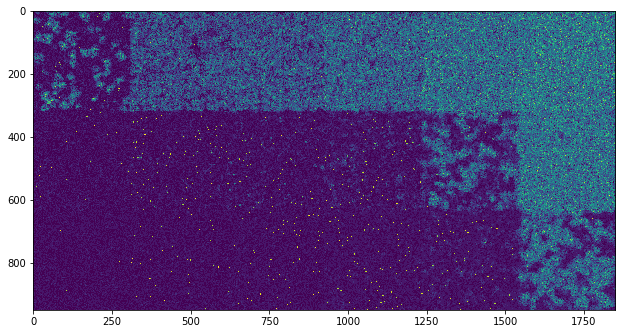

In [7]:
plt.figure(figsize = (11,5.5))
img_plot = plt.imshow(asho)

In [ ]:
*int*?

In [ ]:
int*?

In [ ]:
%config

In [ ]:
%config InlineBackend.rc

In [ ]:
%config InlineBackend

In [ ]:
%config DisplayFormatter

# PARAMETERS.txt

in most scripts

bmin is constant

bmax varies from xlo to xhi

smin is constant

smax varies from ylo to yhi


#bfade, q, qqq are purely visual ... not related to Cc of Golly



#=============================
#a standard rule notation

#https://www.conwaylife.com/wiki/Larger_than_Life

#Rr,Cc,M1,Ssmin..smax,Bbmin..bmax,Nn

#Rr specifies the range (r is from 1 to 500 in Golly and LifeViewer; 1 to 10 in MCell).

diam = 2*r + 1

#Cc specifies the number of states (c is from 0 to 255 in Golly, LifeViewer and MCell[note 1])

#Mm specifies if the middle cell is included in the neighborhood count (m is 0 or 1).

PyMartinCA uses M1 or weighted
M1 internally even for HROT 

#Ssmin..smax specifies the count limits for a state 1 cell to survive.

#Bbmin..bmax specifies the count limits for a dead cell to become a birth.

#Nn specifies the extended neighborhood type (n is M for Moore or N for von Neumann. Golly and LifeViewer also support C for Circular neighborhood)

PyMartinCA uses NM or weighted




###===================
###a historical note
#in legacy  source code, by Martin Novy
#slo==smin
#shi==smax
#blo==bmin
#bhi==bmax


###then there was a mass-rename 
###sed   --regexp-extended    -i.sedzalo22 's/\bblo\b/bmin/g' **.py
###sed   --regexp-extended    -i.sedza2 's/\bbhi\b/bmax/g' **.py
###sed   --regexp-extended    -i.sedza3 's/\bslo\b/smin/g' **.py
###sed   --regexp-extended    -i.sedza4 's/\bshi\b/smax/g' **.py
 
###sed   --regexp-extended    -i.sedz5 's/bfade, q, qqq may be related to Cc/parameters are described at PARAMETERS.txt/g' **.py
###sed ...


###===================
#PyMartinCA scripts originally evolved from
#http://nbviewer.ipython.org/github/martin12333/teaching-simso/blob/master/52-largerthanlife.ipynb
#https://github.com/thearn/game-of-life/blob/master/conway.py
